# Portuguese Bank Aquisition Analytics

In [1]:
# import relevant packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#statsmodels
import statsmodels.api as sm

# scikit libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# set other options
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [2]:
# load the data
campaign = pd.read_csv('bank_marketing.csv', sep=',')
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# shape
campaign.shape

(41188, 21)

In [4]:
# check info
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
# check if any row has all the values as missing
campaign[campaign.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response


In [6]:
# check for duplicated data
print('Dupilcated rows:', campaign[campaign.duplicated()].shape[0])
campaign[campaign.duplicated()]

Dupilcated rows: 12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [7]:
# delete duplicate rows
campaign.drop_duplicates(keep='first', inplace=True)
campaign.shape

(41176, 21)

In [8]:
# check for null values across columns
campaign.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

There are no missing values.

## 1. EDA 

### 1.1 Target variable - response

In [9]:
# check the response variable
campaign['response'].value_counts()

no     36537
yes     4639
Name: response, dtype: int64

In [10]:
# map response to 0 or 1
campaign['response'] = campaign['response'].map({'yes':1, 'no':0})
campaign['response'].value_counts()

0    36537
1     4639
Name: response, dtype: int64

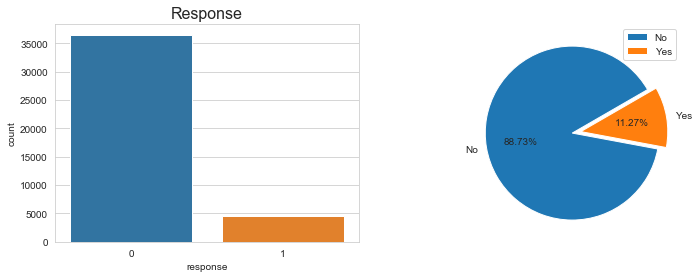

In [11]:
# plot and visualize the percentage of the response variable
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(campaign['response'])
plt.title('Response', fontsize=16)

plt.subplot(122)
x = [campaign['response'].value_counts()[0], campaign['response'].value_counts()[1]]
plt.pie(x, labels=['No','Yes'],autopct='%1.2f%%',explode=[0,0.1],startangle=30)
plt.legend(loc='best')

plt.show()

There is a huge imbalance in the data.

### 1.2. Client related data:
1. age
2. job
3. marital
4. education
5. default
6. housing
7. loan

In [12]:
# generic function to plot distribution of numerical variable
def plot_distribution(feature):
    plt.figure(figsize=(12,5))
                        
    plt.subplot(121)
    sns.distplot(feature)
                        
    plt.subplot(122)
    sns.boxplot(feature)
                        
    plt.show()                    

#### 1.2.1 age
-  Age of Prospect

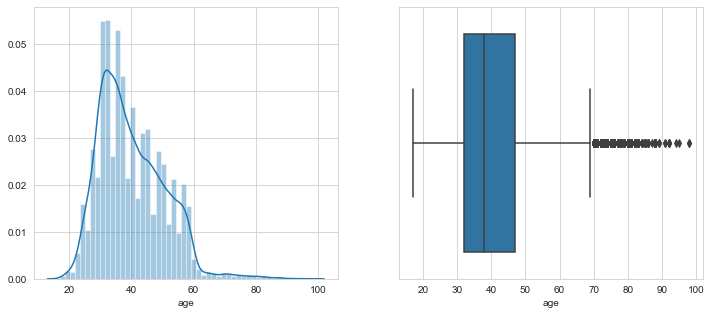

In [13]:
plot_distribution(campaign['age'])

In [14]:
# check percentiles
campaign['age'].describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
95%         58.00000
99%         71.00000
max         98.00000
Name: age, dtype: float64

Assuming the behaviour of prospects won't differ significantly with age greater than 70 years old. Let's cap the age greater than 71 to 71.

In [15]:
campaign['age'][campaign['age'] > 71] = 71

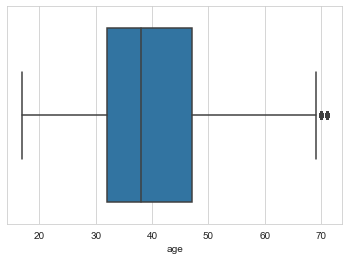

In [16]:
sns.boxplot(campaign['age'])

In [17]:
# bin the age into buckets of 10
age_bins = np.arange(10,max(campaign['age'])+10,10)
age_bins

array([10, 20, 30, 40, 50, 60, 70, 80])

In [18]:
# create new variable age_bins
campaign['age_bins'] = pd.cut(campaign['age'],bins=age_bins, include_lowest=True)
campaign['age_bins'].value_counts()

(30.0, 40.0]     16380
(40.0, 50.0]     10237
(20.0, 30.0]      7241
(50.0, 60.0]      6269
(60.0, 70.0]       488
(70.0, 80.0]       421
(9.999, 20.0]      140
Name: age_bins, dtype: int64

In [19]:
# check response rate w.r.t age_bins variable
no_of_prospects = campaign.groupby('age_bins')['response'].count().reset_index(name='no_of_prospects')
no_of_prospects

,age_bins,no_of_prospects
0,"(9.999, 20.0]",140
1,"(20.0, 30.0]",7241
2,"(30.0, 40.0]",16380
3,"(40.0, 50.0]",10237
4,"(50.0, 60.0]",6269
5,"(60.0, 70.0]",488
6,"(70.0, 80.0]",421


In [20]:
responders = campaign.groupby('age_bins')['response'].sum().reset_index(name='responders')
responders

,age_bins,responders
0,"(9.999, 20.0]",57
1,"(20.0, 30.0]",1067
2,"(30.0, 40.0]",1597
3,"(40.0, 50.0]",836
4,"(50.0, 60.0]",668
5,"(60.0, 70.0]",212
6,"(70.0, 80.0]",202


In [21]:
# merge the 2 data frames
age_df = no_of_prospects.merge(responders, on='age_bins')
age_df

,age_bins,no_of_prospects,responders
0,"(9.999, 20.0]",140,57
1,"(20.0, 30.0]",7241,1067
2,"(30.0, 40.0]",16380,1597
3,"(40.0, 50.0]",10237,836
4,"(50.0, 60.0]",6269,668
5,"(60.0, 70.0]",488,212
6,"(70.0, 80.0]",421,202


In [22]:
# calcualte response rate
age_df['response_rate'] = round(100*(age_df['responders']/age_df['no_of_prospects']),2)
age_df

,age_bins,no_of_prospects,responders,response_rate
0,"(9.999, 20.0]",140,57,40.71
1,"(20.0, 30.0]",7241,1067,14.74
2,"(30.0, 40.0]",16380,1597,9.75
3,"(40.0, 50.0]",10237,836,8.17
4,"(50.0, 60.0]",6269,668,10.66
5,"(60.0, 70.0]",488,212,43.44
6,"(70.0, 80.0]",421,202,47.98


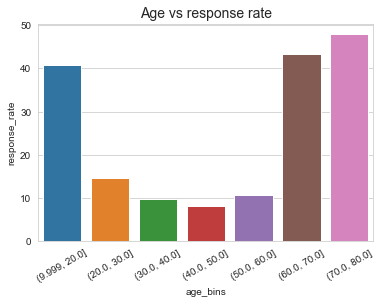

In [23]:
# plot Age vs response rate
sns.barplot(x='age_bins',y='response_rate',data=age_df)
plt.xticks(rotation=30)
plt.title('Age vs response rate', fontsize=14)
plt.show()

As it can be seen that the youngest and the eldest are the most likely to buy the term deposit being offered by the bank, but this can't be said with a surity as the number of prospects in these buckets are very low compared to the numbers in the other buckets. There can be some bias in these ranges.

Similarly, let's look at the relation between response rate and job. Since job is already a categorical variable, we don't need to bucket the data.

`Creating a common function to calculate the response rate of categorical variables w.r.t to the response variable and also plot them`

In [24]:
# common function to get categorical variable vs response data frame
def cat_vs_response(cat, rot):
    no_of_prospects = campaign.groupby(cat)['response'].count().reset_index(name='no_of_prospects')
    responders = campaign.groupby(cat)['response'].sum().reset_index(name='responders')
    agg_df = no_of_prospects.merge(responders, on=cat)    
    agg_df['response_rate'] = round(100*(agg_df['responders']/agg_df['no_of_prospects']),2)
    
    plt.figure(figsize=(10,4))
    ax = sns.barplot(x=cat,y='response_rate',data=agg_df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rot)
    plt.title(cat + ' vs response rate', fontsize='xx-large')
    plt.show()
    
    return agg_df

#### 1.2.2 job
- Type of job

In [25]:
campaign['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

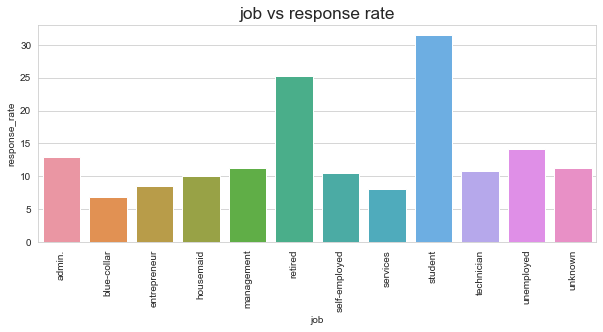

,job,no_of_prospects,responders,response_rate
0,admin.,10419,1351,12.97
1,blue-collar,9253,638,6.90
2,entrepreneur,1456,124,8.52
3,housemaid,1060,106,10.00
4,management,2924,328,11.22
5,retired,1718,434,25.26
6,self-employed,1421,149,10.49
7,services,3967,323,8.14
8,student,875,275,31.43
9,technician,6739,730,10.83


In [26]:
agg_job = cat_vs_response('job',90)
agg_job

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is reiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### 1.2.3 marital
- Marital status 

In [27]:
campaign.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [28]:
campaign.replace({'marital': {'unknown': 'married'}}, inplace=True)
campaign.marital.value_counts()

married     25001
single      11564
divorced     4611
Name: marital, dtype: int64

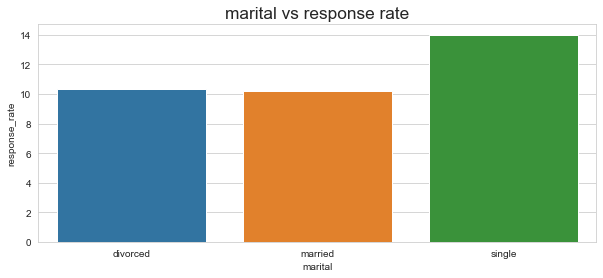

,marital,no_of_prospects,responders,response_rate
0,divorced,4611,476,10.32
1,married,25001,2543,10.17
2,single,11564,1620,14.01


In [29]:
agg_marital = cat_vs_response('marital',0)
agg_marital

It can be noticed that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### 1.2.4 education
- Education level

In [30]:
campaign['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

Bin the education to 3 levels, i.e., primary education, secondary education, tertiary education, and professional course.
Also, let's assign illiterate to primary education, since that's the level closest to illiterate level and the value count is also very less, i.e., 18.

In [31]:
campaign.replace({'education': {
    'basic.9y': 'primary_education', 'basic.6y': 'primary_education', 'basic.4y': 'primary_education', 
    'illiterate': 'primary_education', 'high.school': 'secondary_education', 'university.degree': 'tertiary_edducation'
}}, inplace=True)

campaign['education'].value_counts()

primary_education      12530
tertiary_edducation    12164
secondary_education     9512
professional.course     5240
unknown                 1730
Name: education, dtype: int64

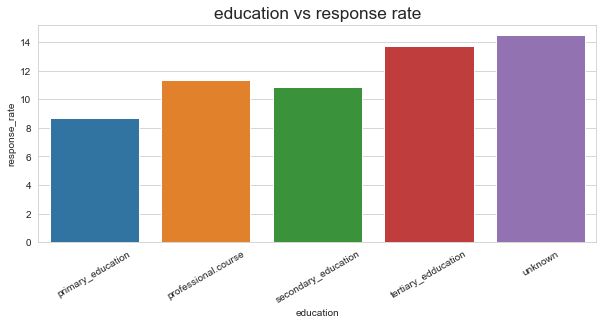

,education,no_of_prospects,responders,response_rate
0,primary_education,12530,1093,8.72
1,professional.course,5240,595,11.35
2,secondary_education,9512,1031,10.84
3,tertiary_edducation,12164,1669,13.72
4,unknown,1730,251,14.51


In [32]:
agg_education = cat_vs_response('education', 30)
agg_education

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### 1.2.5 default 
-  Has credit in default? (categorical: 'no','yes','unknown')

In [33]:
campaign['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

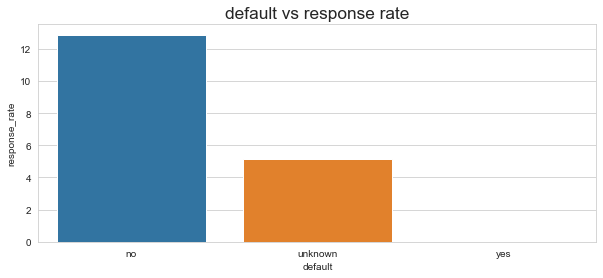

,default,no_of_prospects,responders,response_rate
0,no,32577,4196,12.88
1,unknown,8596,443,5.15
2,yes,3,0,0.00


In [34]:
agg_default = cat_vs_response('default', 0)
agg_default

Majority of the prospects didn't have default in their previous loan

#### 1.2.6 housing
 - Has housing loan? (categorical: 'no','yes','unknown')

In [35]:
campaign['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

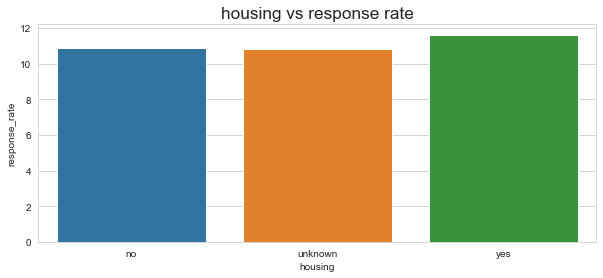

,housing,no_of_prospects,responders,response_rate
0,no,18615,2025,10.88
1,unknown,990,107,10.81
2,yes,21571,2507,11.62


In [36]:
agg_housing = cat_vs_response('housing',0)
agg_housing

It can be seen that there is a slight uptick in the response rate for people with housing loan, though it is probably not very significant.

#### 1.2.7 loan
- Has personal loan? (categorical: 'no','yes','unknown')

In [37]:
campaign['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

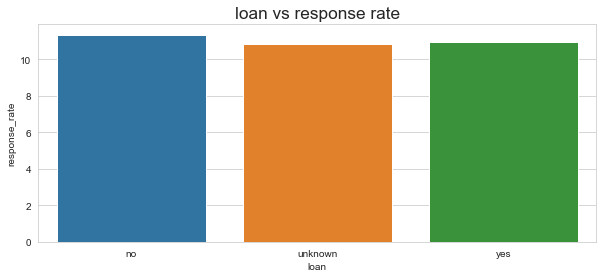

,loan,no_of_prospects,responders,response_rate
0,no,33938,3849,11.34
1,unknown,990,107,10.81
2,yes,6248,683,10.93


In [38]:
agg_loan = cat_vs_response('loan',0)
agg_loan

As it can be seen there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product.

### 1. 3 Campaign related data:
1. contact
2. month
3. day_of_week
4. duration
5. campaign
6. pdays
7. previous
8. poutcome

#### 1.3.1 contact
- contact communication type

In [39]:
campaign['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

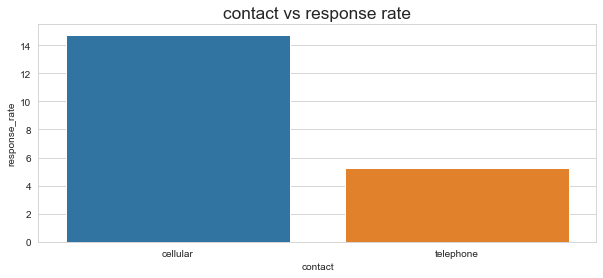

,contact,no_of_prospects,responders,response_rate
0,cellular,26135,3852,14.74
1,telephone,15041,787,5.23


In [40]:
agg_contact = cat_vs_response('contact',0)
agg_contact

It can be seen that the prospective customers contacted through cellular medium are significantly more likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### 1.3.2 month
- last contact month of year

In [41]:
campaign['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

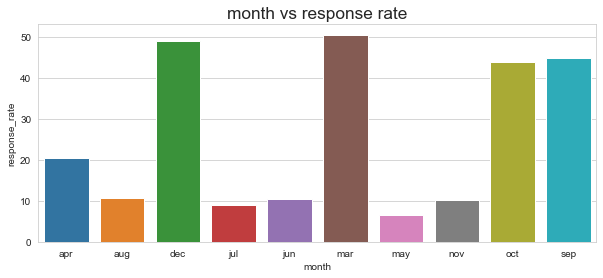

,month,no_of_prospects,responders,response_rate
0,apr,2631,539,20.49
1,aug,6176,655,10.61
2,dec,182,89,48.90
3,jul,7169,648,9.04
4,jun,5318,559,10.51
5,mar,546,276,50.55
6,may,13767,886,6.44
7,nov,4100,416,10.15
8,oct,717,315,43.93
9,sep,570,256,44.91


In [42]:
agg_month = cat_vs_response('month', 0)
agg_month

The four months of december, march, october and september appear to be the best to contact the potential customers. However, these four months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### 1.3.3 day_of_week
- last contact day of the week

In [43]:
campaign['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

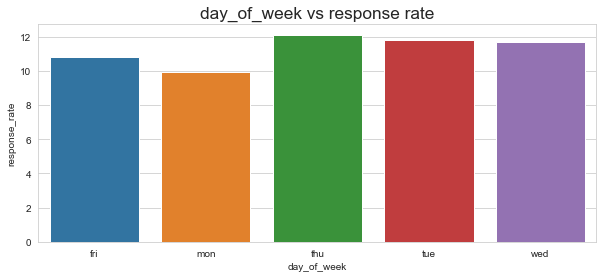

,day_of_week,no_of_prospects,responders,response_rate
0,fri,7826,846,10.81
1,mon,8512,847,9.95
2,thu,8618,1044,12.11
3,tue,8086,953,11.79
4,wed,8134,949,11.67


In [44]:
agg_day_of_week = cat_vs_response('day_of_week',0)
agg_day_of_week

As it can be seen that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### 1.3.4 duration
- last contact duration, in seconds

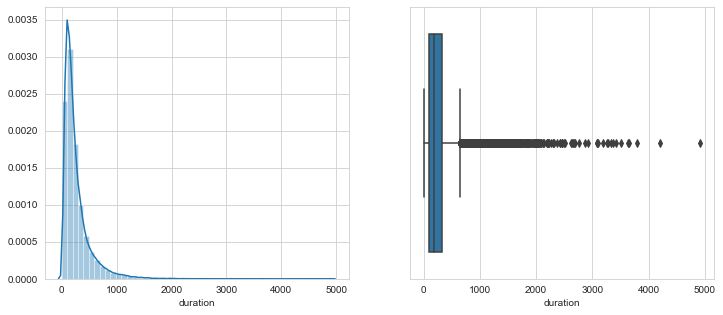

In [45]:
plot_distribution(campaign['duration'])

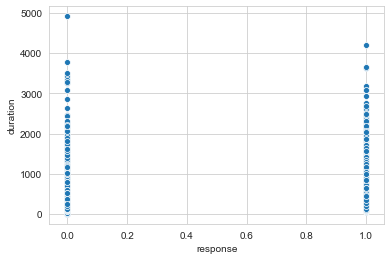

In [46]:
sns.scatterplot(x='response', y='duration', data=campaign)

---

It can be seen that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. **Thus, this input should only be included for benchmark purposes and should be discarded from model building phase**.

Hence, will drop this variable later in the data preparation step.

---

#### 1.3.5 campaign
-  Number of contacts performed during this campaign and for this client

In [47]:
campaign['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

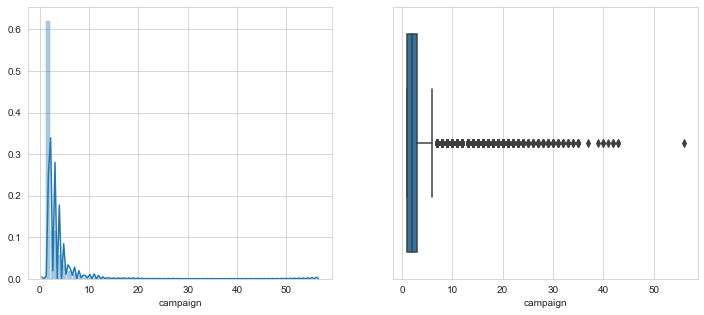

In [48]:
plot_distribution(campaign['campaign'])

There are a lot of outliers. let's check the percentiles.

In [49]:
campaign['campaign'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          5.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

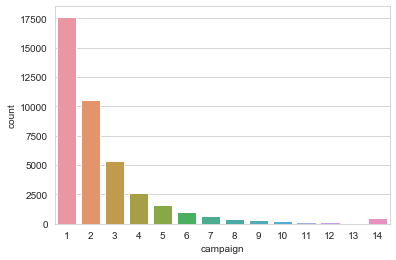

In [50]:
# capping the ones above 99th percentile to 99th percentile.
campaign['campaign'].loc[campaign['campaign'] > 14] = 14
sns.countplot(campaign['campaign'])

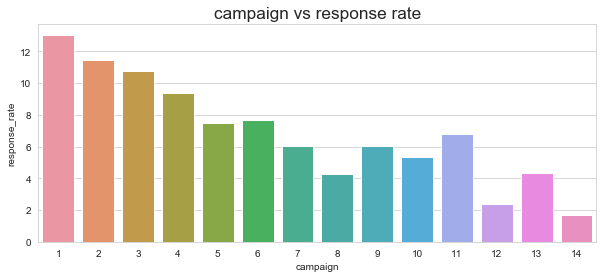

,campaign,no_of_prospects,responders,response_rate
0,1,17634,2299,13.04
1,2,10568,1211,11.46
2,3,5340,574,10.75
3,4,2650,249,9.40
4,5,1599,120,7.50
5,6,979,75,7.66
6,7,629,38,6.04
7,8,400,17,4.25
8,9,283,17,6.01
9,10,225,12,5.33


In [51]:
agg_campaign = cat_vs_response('campaign',0)
agg_campaign

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### 1.3.6 pdays
- Number of days that passed by after the client was last contacted from a previous campaign

In [52]:
campaign['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

999 indicates the prospect has never been contacted before, i.e., first time contacted. <br>
Bucketing them into 3 groups: 
1. contacted within the first 10 days,
2. contacted after 10 days,
3. and first time contacted

In [53]:
campaign['pdays'].loc[campaign['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])] = 'Contacted_in_first_10_days'
campaign['pdays'].loc[campaign['pdays'].isin([999])]='First_time_contacted'
campaign['pdays'].loc[~campaign['pdays'].isin(['Contacted_in_first_10_days', 'First_time_contacted'])]='Contacted_after_10_days'

campaign['pdays'].value_counts()

First_time_contacted          39661
Contacted_in_first_10_days     1311
Contacted_after_10_days         204
Name: pdays, dtype: int64

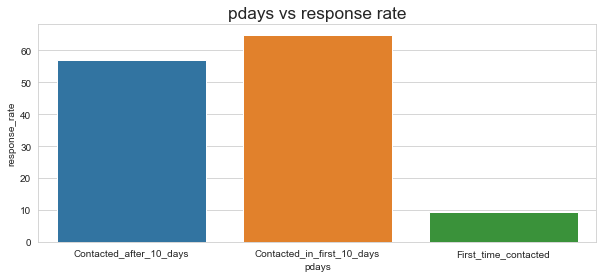

,pdays,no_of_prospects,responders,response_rate
0,Contacted_after_10_days,204,116,56.86
1,Contacted_in_first_10_days,1311,851,64.91
2,First_time_contacted,39661,3672,9.26


In [54]:
agg_pdays = cat_vs_response('pdays',0)
agg_pdays

Though there is a huge difference in the response rates of the three categories, it can be seen that there is also a huge difference in the volume of data entries in these categories.

#### 1.3.7 previous
-  Number of contacts performed before this campaign and for this client

In [55]:
campaign['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Bucketing previous variable into 3 groups, i.e., 
1. never contacted, 
2. less than 3 times, 
3. and more than 3 times 

In [56]:
campaign['previous'][campaign['previous'].isin([0])] = 'never_contacted'
campaign['previous'][campaign['previous'].isin([1,2,3])] = 'less_than_3_times'
campaign['previous'][campaign['previous'].isin([4,5,6,7])] = 'more_than_3_times'

campaign.previous.value_counts()

never_contacted      35551
less_than_3_times     5531
more_than_3_times       94
Name: previous, dtype: int64

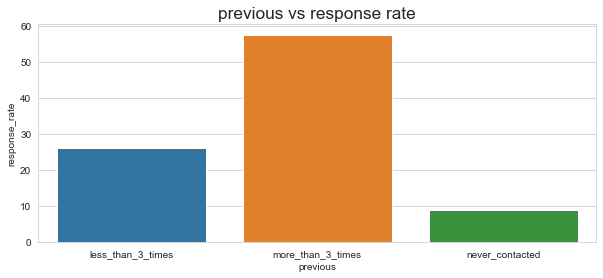

,previous,no_of_prospects,responders,response_rate
0,less_than_3_times,5531,1445,26.13
1,more_than_3_times,94,54,57.45
2,never_contacted,35551,3140,8.83


In [57]:
agg_previous = cat_vs_response('previous',0)
agg_previous

It can be seen that the response rate is greatest for the the potential customers having previous contact of more than three. However, the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

#### 1.3.8 poutcome
- Outcome of the previous marketing campaign

In [58]:
campaign['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

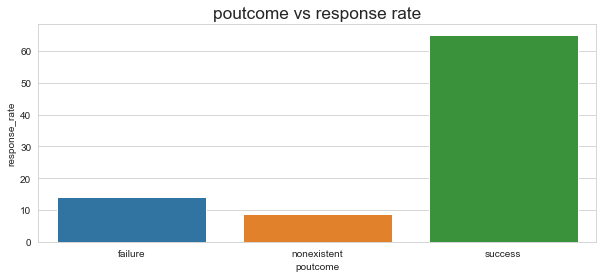

,poutcome,no_of_prospects,responders,response_rate
0,failure,4252,605,14.23
1,nonexistent,35551,3140,8.83
2,success,1373,894,65.11


In [59]:
agg_poutcome = cat_vs_response('poutcome',0)
agg_poutcome

More than 60% of the prospects were acquired with the previous campaign.

### 1.4 Social and Economic context data
1. emp.var.rate
2. cons.price.idx
3. cons.conf.idx
4. euribor3m
5. nr.employed

#### 1.4.1 emp.var.rate
- Employment Variation Rate - Quarterly Indicator

In [60]:
campaign['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

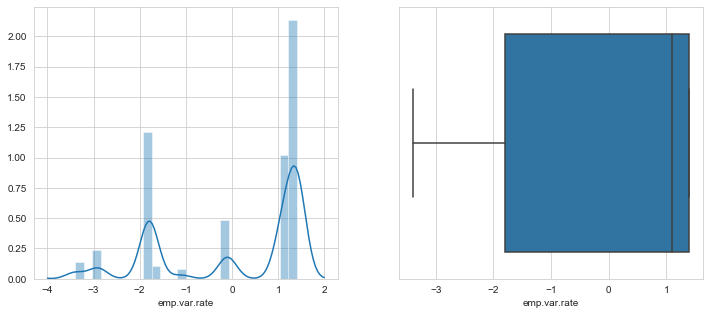

In [61]:
plot_distribution(campaign['emp.var.rate'])

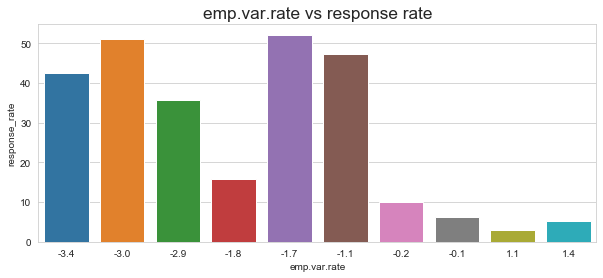

,emp.var.rate,no_of_prospects,responders,response_rate
0,-3.4,1070,454,42.43
1,-3.0,172,88,51.16
2,-2.9,1662,593,35.68
3,-1.8,9182,1461,15.91
4,-1.7,773,403,52.13
5,-1.1,635,301,47.40
6,-0.2,10,1,10.00
7,-0.1,3682,232,6.30
8,1.1,7762,240,3.09
9,1.4,16228,866,5.34


In [62]:
agg_emp_var_rate = cat_vs_response('emp.var.rate',0)
agg_emp_var_rate

It can be noted that a negative employment variation rate seems to be related to higher response rates.

#### 1.4.2 cons.price.idx
- Consumer Price Index - Monthly Indicator 

In [63]:
campaign['cons.price.idx'].value_counts()

93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

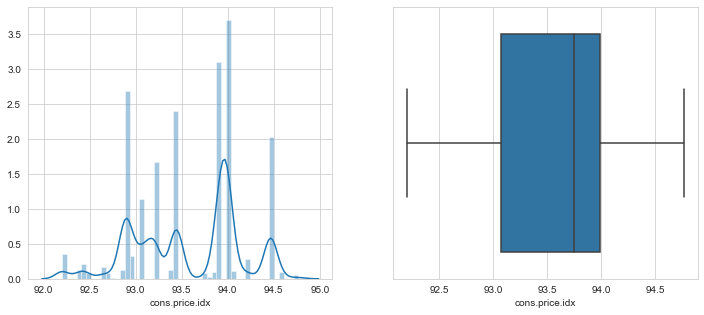

In [64]:
plot_distribution(campaign['cons.price.idx'])

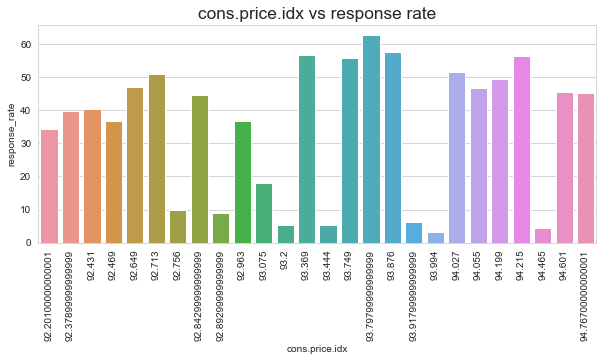

,cons.price.idx,no_of_prospects,responders,response_rate
0,92.201,770,264,34.29
1,92.379,267,106,39.70
2,92.431,446,180,40.36
3,92.469,177,65,36.72
4,92.649,357,168,47.06
5,92.713,172,88,51.16
6,92.756,10,1,10.00
7,92.843,282,126,44.68
8,92.893,5793,524,9.05
9,92.963,715,264,36.92


In [65]:
agg_cons_price_idx = cat_vs_response('cons.price.idx',90)
agg_cons_price_idx

#### 1.4.3 cons.conf.idx
- Consumer Confidence Index - Monthly Indicator

In [66]:
campaign['cons.conf.idx'].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

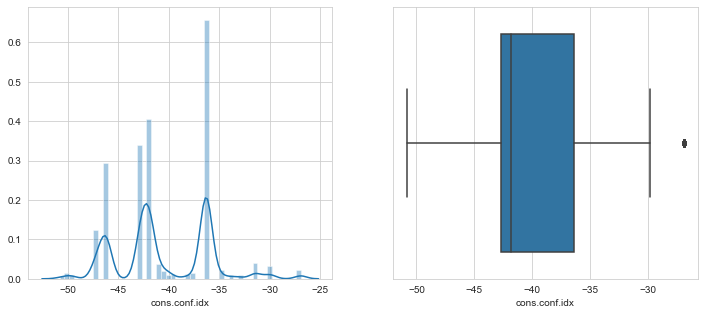

In [67]:
plot_distribution(campaign['cons.conf.idx'])

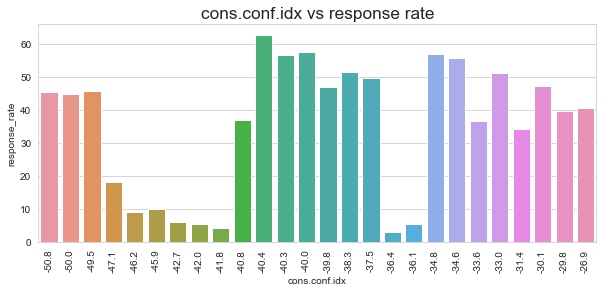

,cons.conf.idx,no_of_prospects,responders,response_rate
0,-50.8,128,58,45.31
1,-50.0,282,126,44.68
2,-49.5,204,93,45.59
3,-47.1,2457,442,17.99
4,-46.2,5793,524,9.05
5,-45.9,10,1,10.00
6,-42.7,6681,407,6.09
7,-42.0,3615,190,5.26
8,-41.8,4374,188,4.30
9,-40.8,715,264,36.92


In [68]:
agg_cons_conf_idx = cat_vs_response('cons.conf.idx', 90)
agg_cons_conf_idx

#### 1.4.5 euribor3m
- Euribor 3 Month Rate - Daily Indicator

In [69]:
campaign['euribor3m'].value_counts()

4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
4.964    1175
1.405    1169
4.965    1070
4.864    1044
4.960    1013
4.968     991
4.959     895
4.860     892
4.855     839
4.076     822
1.266     820
4.859     788
4.120     756
4.858     733
4.153     689
4.021     676
4.967     643
1.281     637
4.966     620
4.191     610
1.250     587
4.958     581
1.291     544
1.327     538
4.957     537
         ... 
0.914       3
4.474       3
1.018       3
1.007       3
1.778       3
0.927       2
4.733       2
3.879       2
0.749       2
0.953       2
0.937       2
0.921       2
3.563       2
0.969       1
3.329       1
1.047       1
3.743       1
3.428       1
3.901       1
1.574       1
3.488       1
3.853       1
3.669       1
3.053       1
3.816       1
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

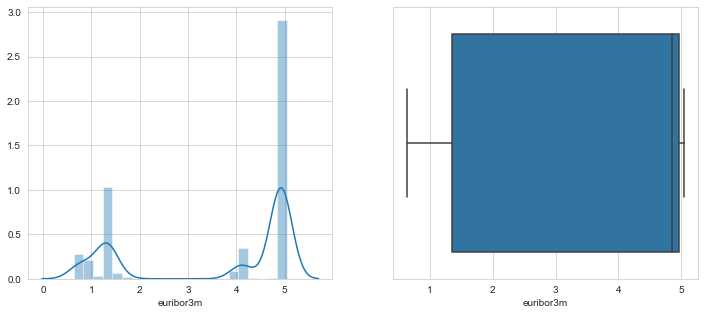

In [70]:
plot_distribution(campaign['euribor3m'])

#### 1.4.6 nr.employed
- Number of Employees - Quarterly Indicator

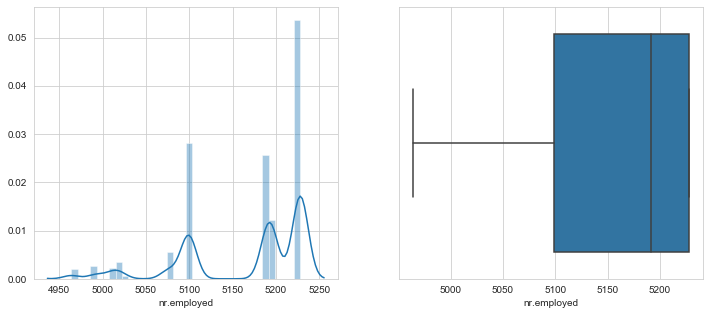

In [71]:
plot_distribution(campaign['nr.employed'])

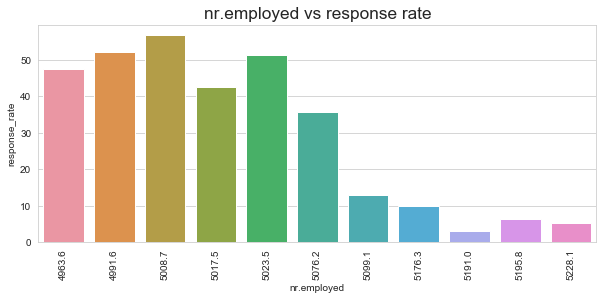

,nr.employed,no_of_prospects,responders,response_rate
0,4963.6,635,301,47.40
1,4991.6,773,403,52.13
2,5008.7,650,369,56.77
3,5017.5,1070,454,42.43
4,5023.5,172,88,51.16
5,5076.2,1662,593,35.68
6,5099.1,8532,1092,12.80
7,5176.3,10,1,10.00
8,5191.0,7762,240,3.09
9,5195.8,3682,232,6.30


In [72]:
agg_nr_employed = cat_vs_response('nr.employed', 90)
agg_nr_employed

## 2. Data Preparation

In [73]:
campaign.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [74]:
# drop columns
campaign.drop(columns = 'age_bins',inplace=True)

### 2.1 Dummy creation

In [75]:
# create dummy cols
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'previous',
           'poutcome']

dummies = pd.get_dummies(campaign[cat_cols], drop_first=True)

campaign = pd.concat([campaign,dummies], axis=1)

campaign.drop(columns=cat_cols, axis=1, inplace=True)

campaign.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_professional.course,education_secondary_education,education_tertiary_edducation,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10_days,pdays_First_time_contacted,previous_more_than_3_times,previous_never_contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0


In [76]:
# add column 'prospect_id'
campaign['prospect_id'] = campaign.index

In [77]:
campaign.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_professional.course,education_secondary_education,education_tertiary_edducation,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10_days,pdays_First_time_contacted,previous_more_than_3_times,previous_never_contacted,poutcome_nonexistent,poutcome_success,prospect_id
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,2
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,3
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,4


### 2.2 Train test split

Variables that will not be used for modelling
- duration
- prospect_id

In [78]:
# split into train and test
X = campaign.drop(['response', 'duration', 'prospect_id'], axis=1)
y = campaign['response']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (28823, 50)
X_test: (12353, 50)
y_train: (28823,)
y_test: (12353,)


### 2.3 Standardization

In [80]:
scaler = StandardScaler()
X_train_columns = X_train.columns

# scale only the continuous feature, i.e, exclude the dummy variables
num_cols = list(set(X_train.columns).difference(set(dummies.columns)))

# fit and transform both, i.e, calculate mean and standard deviation and scale
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_professional.course,education_secondary_education,education_tertiary_edducation,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10_days,pdays_First_time_contacted,previous_more_than_3_times,previous_never_contacted,poutcome_nonexistent,poutcome_success
40525,-1.073560,-0.652117,-1.135017,0.779166,0.479056,-1.573665,-2.424927,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3761,0.988006,-0.652117,0.648520,0.722081,0.890422,0.713967,0.332804,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
36471,-0.877220,0.652856,-1.899389,-1.061383,-0.062215,-1.360406,-1.254896,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
38894,1.282515,-0.217126,-2.217878,-1.604552,2.254424,-1.674531,-2.066726,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
40266,1.184345,-0.652117,-1.135017,1.104375,0.046039,-1.571936,-2.424927,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


In [81]:
# only transform here, i.e, scale based on the mean and std calculated for X_train
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_professional.course,education_secondary_education,education_tertiary_edducation,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10_days,pdays_First_time_contacted,previous_more_than_3_times,previous_never_contacted,poutcome_nonexistent,poutcome_success
22409,-0.288202,-0.652117,0.839613,-0.229330,0.955374,0.774486,0.845903,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
7844,-0.877220,-0.652117,0.839613,1.536835,-0.278724,0.717425,0.845903,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
37808,0.300817,-0.217126,-1.899389,-2.379520,1.972963,-1.603637,-1.254896,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
29235,0.791666,0.217865,-1.198714,-0.867641,-1.426218,-1.276832,-0.938186,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39374,1.773364,0.652856,-1.198714,-0.359068,1.236835,-1.720641,-2.188431,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0


## 3. Modelling

### 3.1 Logistic Regression using statsmodels

In [82]:
# Fitting the logistic model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28823
Model:                            GLM   Df Residuals:                    28774
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7999.0
Date:                Sat, 22 Aug 2020   Deviance:                       15998.
Time:                        17:25:34   Pearson chi2:                 2.94e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.5907      0.279     -5.703      0.000      -2.137      -1.044
age                                  0.0152      0.026      0.574      0.566      -0.037       0.067
campaign                            -0.0926      0.027     -3.462      0.001      -0.145      -0.040
emp.var.rate                        -2.2318      0.230     -9.693      0.000      -2.683      -1.781
cons.price.idx                       1.2050      0.150      8.021      0.000       0.911       1.499
cons.conf.idx                        0.1715      0.039      4.427      0.000       0.096       0.247
euribor3m                            0.1576      0.237      0.665      0.506      -0.307       0.623
nr.employed                          0.5876      0.233      2.526      0.012       0.132       1.044
job_blue-collar                     -0.1086      0.082     -1.330      0.183      -0.269       0.051
job_entrepreneur                    -0.0314      0.126     -0.250      0.803      -0.278       0.215
job_housemaid                       -0.0679      0.150     -0.452      0.651      -0.362       0.226
job_management                      -0.0379      0.090     -0.424      0.672      -0.213       0.137
job_retired                          0.2152      0.111      1.943      0.052      -0.002       0.432
job_self-employed                   -0.0270      0.119     -0.226      0.821      -0.261       0.207
job_services                        -0.1162      0.090     -1.294      0.196      -0.292       0.060
job_student                          0.2465      0.120      2.056      0.040       0.012       0.481
job_technician                      -0.0140      0.075     -0.188      0.851      -0.160       0.132
job_unemployed                      -0.0773      0.136     -0.567      0.571      -0.345       0.190
job_unknown                         -0.0964      0.260     -0.371      0.711      -0.606       0.413
marital_married                      0.0093      0.071      0.130      0.896      -0.130       0.149
marital_single                       0.0480      0.081      0.591      0.555      -0.111       0.207
education_professional.course        0.0346      0.085      0.404      0.686      -0.133       0.202
education_secondary_education        0.0154      0.072      0.214      0.831      -0.126       0.156
education_tertiary_edducation        0.0868      0.073      1.195      0.232      -0.056       0.229
education_unknown                    0.1655      0.110      1.510      0.131      -0.049       0.380
default_unknown                     -0.3517      0.070     -5.041      0.000      -0.489      -0.215
default_yes                        -18.5996   1.68e+04     -0.001      0.999   -3.29e+04    3.29e+04
housing_unknown                     -0.0611      0.07

`There are lot of features that have high p-value, which means they might be insignificant. Tuning this model further would involve dropping the variables one by one. Let's also check the correlations of the numerical features.`

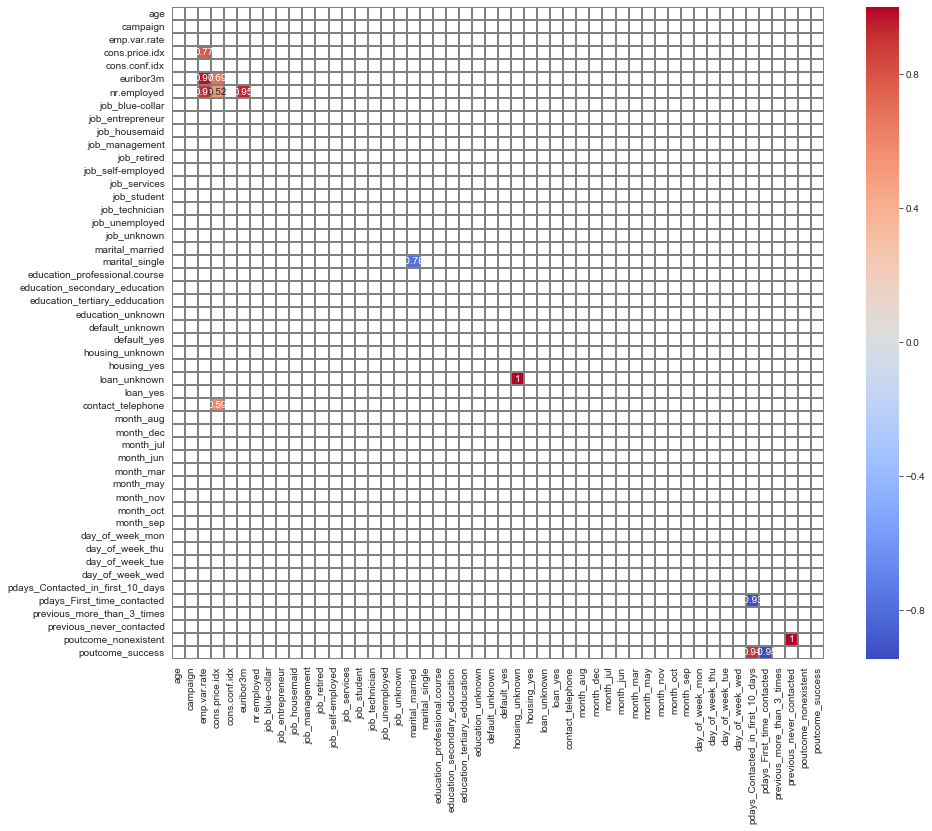

In [83]:
# plot heat map
# 1. correlations more than 0.5 (positive correlations)
# 2. correlations less tha -0.5 (negative correlations)
plt.figure(figsize=(15,12))
matrix= np.triu(X_train.corr())
corr = X_train.corr()
corr_new = corr[(corr > 0.5) | (corr < -0.5)]
sns.heatmap(corr_new, annot=True,cmap= 'coolwarm', square=True, mask=matrix,linecolor='gray', linewidths=1)
plt.show()

`Since, there is multicolliniearity present in the data, dropping these features would result in loss of information so, let's use PCA to extract maximum information from all of the predictors.`

### 3.2 Principal Component Analysis

In [84]:
# instantiate pca object
pca = PCA(svd_solver='randomized', random_state=42)

# fit the data frame to pca object
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [85]:
# check componenets 
pca.components_

array([[-1.72737328e-02, -1.09748421e-01, -5.15470613e-01, ...,
        -9.15748212e-02, -9.15748212e-02,  2.53075352e-02],
       [ 7.16445474e-01, -1.44149237e-01, -3.23137243e-02, ...,
        -7.84821695e-03, -7.84821695e-03,  1.71669145e-02],
       [ 4.40746397e-01,  7.88948562e-01, -3.77454969e-02, ...,
        -8.04379187e-03, -8.04379187e-03, -5.25210389e-03],
       ...,
       [-2.46607786e-05,  4.59120327e-05, -3.87596077e-04, ...,
         1.87372920e-04,  1.87372920e-04, -3.60185104e-05],
       [ 0.00000000e+00,  4.00420836e-18, -1.24436588e-16, ...,
        -7.04719383e-01,  7.04719383e-01,  2.39872245e-16],
       [ 0.00000000e+00, -5.03233999e-18, -7.39106088e-17, ...,
         5.80567976e-02, -5.80567976e-02, -2.43789962e-16]])

In [86]:
# Data frame with pc1 and pc2
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.017274,0.716445,age
1,-0.109748,-0.144149,campaign
2,-0.515471,-0.032314,emp.var.rate
3,-0.411279,-0.115435,cons.price.idx
4,-0.130096,0.599692,cons.conf.idx


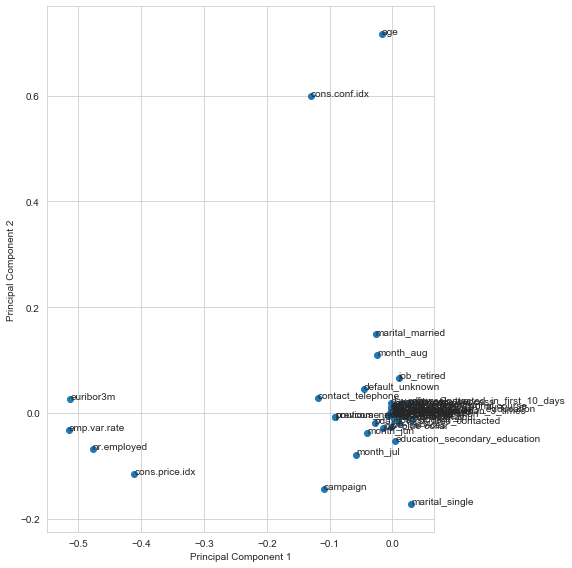

In [87]:
# Plot original features on the first 2 principal components as axes
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [88]:
# calculate cumulative variance for each pca
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# check the cumulative variance explained by principal components
print(pd.Series(np.round(var_cumu, 4)*100))

0      32.75
1      43.53
2      52.43
3      60.57
4      66.34
5      69.64
6      72.22
7      74.57
8      76.79
9      78.73
10     80.63
11     82.47
12     84.29
13     86.05
14     87.70
15     89.19
16     90.44
17     91.60
18     92.65
19     93.40
20     94.10
21     94.69
22     95.20
23     95.71
24     96.17
25     96.58
26     96.97
27     97.36
28     97.71
29     98.02
30     98.32
31     98.58
32     98.82
33     99.04
34     99.21
35     99.37
36     99.51
37     99.63
38     99.74
39     99.80
40     99.86
41     99.89
42     99.93
43     99.95
44     99.97
45     99.99
46    100.00
47    100.00
48    100.00
49    100.00
dtype: float64


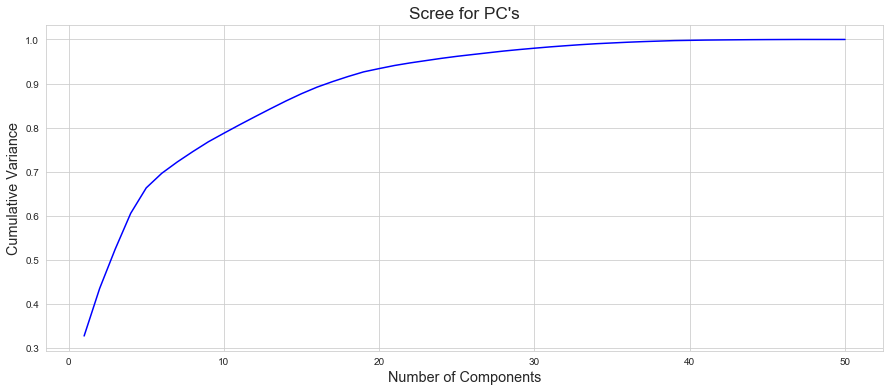

In [89]:
# plot scree
plt.figure(figsize=(15,6))
plt.title('Scree for PC\'s', fontsize='xx-large')
plt.xlabel('Number of Components', fontsize='x-large')
plt.ylabel('Cumulative Variance', fontsize='x-large')
plt.plot(range(1, len(var_cumu)+1), var_cumu, 'b-')
plt.show()

Looking at the scree plot the variance starts levelling off post 30 components, but taking 30 would be computationally expensive. Let's take components that explain 90% of the variance in the data. By the plot, it can be observed that it lies at 16.

### 3.3 Pipeline using Logistic with PCA = 16

In [90]:
# create pipeline
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced')) # since the data highly imbalanced
        ]
pipeline = Pipeline(steps)

In [91]:
# fit model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [92]:
# generic function to get classification report
def classification_report(y_true, y_pred):
    return metrics.classification_report(y_true, y_pred)

# generic function to get confusion matrix
def confusion_matrix(y_true, y_pred):
    return metrics.confusion_matrix(y_true, y_pred)

# generic function to get sensitivity / recall
def sesitivity(confusion):
    TP = confusion[1,1] # true positive 
    FN = confusion[1,0] # false negatives
    return (TP / float(TP+FN)).round(2)

In [93]:
# predict response on train data
y_train_pred = pipeline.predict(X_train)

# classification report
class_report = classification_report(y_train, y_train_pred)
print(class_report)

# Confusion matrix 
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

# sensitivity
sensitivity = sesitivity(confusion)
print('\nSensitivity:', sensitivity)

# check area under curve
y_train_pred_prob = pipeline.predict_proba(X_train)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_train, y_train_pred_prob),2))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     25566
           1       0.33      0.62      0.43      3257

    accuracy                           0.82     28823
   macro avg       0.64      0.73      0.66     28823
weighted avg       0.88      0.82      0.84     28823

[[21492  4074]
 [ 1226  2031]]

Sensitivity: 0.62
AUC: 0.78


In [94]:
# predict response on test data
y_test_pred = pipeline.predict(X_test)

# classification report
class_report = classification_report(y_test, y_test_pred)
print(class_report)

# Confusion matrix 
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

# sensitivity
sensitivity = sesitivity(confusion)
print('\nSensitivity:', sensitivity)

# check area under curve
y_test_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_test, y_test_pred_prob),2))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10971
           1       0.33      0.63      0.44      1382

    accuracy                           0.82     12353
   macro avg       0.64      0.74      0.66     12353
weighted avg       0.88      0.82      0.84     12353

[[9240 1731]
 [ 511  871]]

Sensitivity: 0.63
AUC: 0.79


The **sensitivity** is pretty low. Let's tune some hyperparameters.

### 3.4 Hyperparameter tuning

In [95]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20,21,22,23], 
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
          'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', verbose=1, n_jobs=-1)

In [96]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           n_jobs=None,
                           

In [97]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.7829403486884825
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 23}


In [98]:
# predict response on train data
y_train_pred = model.predict(X_train)

# classification report
class_report = classification_report(y_train, y_train_pred)
print(class_report)

# Confusion matrix 
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

# sensitivity
sensitivity = sesitivity(confusion)
print('\nSensitivity:', sensitivity)

# check area under curve
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_train, y_train_pred_prob),2))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88     25566
           1       0.32      0.63      0.43      3257

    accuracy                           0.81     28823
   macro avg       0.63      0.73      0.66     28823
weighted avg       0.88      0.81      0.83     28823

[[21222  4344]
 [ 1202  2055]]

Sensitivity: 0.63
AUC: 0.78


In [99]:
# predict response on test data
y_test_pred = model.predict(X_test)

# classification report
class_report = classification_report(y_test, y_test_pred)
print(class_report)

# Confusion matrix 
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

# sensitivity
sensitivity = sesitivity(confusion)
print('\nSensitivity:', sensitivity)

# check area under curve
y_test_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_test, y_test_pred_prob),2))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10971
           1       0.33      0.64      0.43      1382

    accuracy                           0.81     12353
   macro avg       0.64      0.74      0.66     12353
weighted avg       0.88      0.81      0.84     12353

[[9151 1820]
 [ 496  886]]

Sensitivity: 0.64
AUC: 0.79


The sensitivity is still low with hyperparameter. Let's plot accuracy, sensitivity and specificity to find out the **optimal cutoff point**.

In [100]:
# create data frame to store actual and predicted churns
y_train_pred_final = pd.DataFrame({'Response_True':y_train.values,
                                   'Response_Prob':y_train_pred_prob,
                                   'Response_Pred':y_train_pred,
                                   'Prospect_Id': y_train.index})
y_train_pred_final.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id
0,0,0.859823,1,40525
1,0,0.144423,0,3761
2,1,0.736101,1,36471
3,1,0.851318,1,38894
4,1,0.925406,1,40266


In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Response_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.859823,1,40525,1,1,1,1,1,1,1,1,1,0
1,0,0.144423,0,3761,1,1,0,0,0,0,0,0,0,0
2,1,0.736101,1,36471,1,1,1,1,1,1,1,1,0,0
3,1,0.851318,1,38894,1,1,1,1,1,1,1,1,1,0
4,1,0.925406,1,40266,1,1,1,1,1,1,1,1,1,1


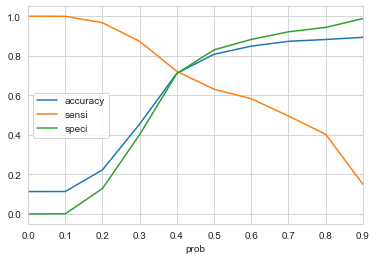

In [102]:
# calculate and plot accuracy, sensitivity, and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Response_True'], y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

#     plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Response_Prob'].map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.859823,1,40525,1,1,1,1,1,1,1,1,1,0,1
1,0,0.144423,0,3761,1,1,0,0,0,0,0,0,0,0,0
2,1,0.736101,1,36471,1,1,1,1,1,1,1,1,0,0,1
3,1,0.851318,1,38894,1,1,1,1,1,1,1,1,1,0,1
4,1,0.925406,1,40266,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# classification report
class_report_train = classification_report(y_train_pred_final['Response_True'], y_train_pred_final.final_predicted)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train_pred_final['Response_True'], y_train_pred_final.final_predicted)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     25566
           1       0.24      0.72      0.36      3257

    accuracy                           0.71     28823
   macro avg       0.60      0.72      0.59     28823
weighted avg       0.87      0.71      0.76     28823

[[18163  7403]
 [  908  2349]]

Sensitivity: 0.72


### Predictions on test set

In [105]:
# create data frame to store actual and predicted churns
y_test_pred_final = pd.DataFrame({'Response_True':y_test.values,
                                   'Response_Prob':y_test_pred_prob,
                                   'Response_Pred':y_test_pred,
                                   'Prospect_Id': y_test.index})
y_test_pred_final.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id
0,0,0.365579,0,22409
1,0,0.308086,0,7844
2,1,0.833292,1,37808
3,0,0.646283,1,29235
4,0,0.755475,1,39374


In [106]:
y_test_pred_final['final_predicted'] = y_test_pred_final['Response_Prob'].map( lambda x: 1 if x > 0.4 else 0)

y_test_pred_final.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id,final_predicted
0,0,0.365579,0,22409,0
1,0,0.308086,0,7844,0
2,1,0.833292,1,37808,1
3,0,0.646283,1,29235,1
4,0,0.755475,1,39374,1


In [107]:
# classification report
class_report_test = classification_report(y_test_pred_final['Response_True'], y_test_pred_final.final_predicted)
print(class_report_test)

# Confusion matrix 
confusion_test = confusion_matrix(y_test_pred_final['Response_True'], y_test_pred_final.final_predicted)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.95      0.71      0.82     10971
           1       0.24      0.73      0.36      1382

    accuracy                           0.71     12353
   macro avg       0.60      0.72      0.59     12353
weighted avg       0.87      0.71      0.76     12353

[[7811 3160]
 [ 378 1004]]

Sensitivity: 0.73


In [108]:
# generic function to dra roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right") 
    plt.show()

    return None

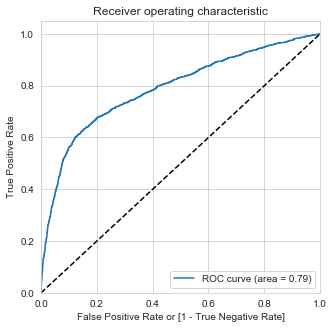

In [109]:
# plot roc curve for test set
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Response_True, 
                                         y_test_pred_final.Response_Prob, drop_intermediate = False)

draw_roc(y_test_pred_final.Response_True, y_test_pred_final.Response_Prob)

The area under the curve for the test set is **0.79**, which is decent enough to proceed with the cost analysis, although below is the result of the train and test set of the final model:

In [110]:
lr_results = pd.DataFrame({'Model': ['Logistic Regression with PCA (PCA, 0.4 cutoff)'],
                           'Sensitivity (Train)': 0.72, 'Sensitivity (Test)': 0.73,
                           'Accuracy (Train)': 0.71, 'Accuracy (Test)': 0.71})
lr_results

,Model,Sensitivity (Train),Sensitivity (Test),Accuracy (Train),Accuracy (Test)
0,"Logistic Regression with PCA (PCA, 0.4 cutoff)",0.72,0.73,0.71,0.71


The values of sensitivity for train and test do not differ much, so we can conclude that the `model is doing well on the train and test sets`.

## 4. Cost Analysis

- Cost per call analysis per prospect

- Top X% prospects to be targetted to meet 80% of the total responders.


### 4.1 Cost per call per prospect

In [111]:
# using the test data frame to continue
y_test_pred_final.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id,final_predicted
0,0,0.365579,0,22409,0
1,0,0.308086,0,7844,0
2,1,0.833292,1,37808,1
3,0,0.646283,1,29235,1
4,0,0.755475,1,39374,1


In [112]:
# merge the duration column to it
cost_per_call = y_test_pred_final.join(campaign['duration'])
cost_per_call.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id,final_predicted,duration
0,0,0.365579,0,22409,0,261.0
1,0,0.308086,0,7844,0,149.0
2,1,0.833292,1,37808,1,226.0
3,0,0.646283,1,29235,1,151.0
4,0,0.755475,1,39374,1,307.0


#### Add another column - cost_of_call

In [113]:
cost_per_call['cost_of_call'] = cost_per_call['duration'].apply(lambda x : x/60 if x % 60 == 0 else (x//60 + 1))
cost_per_call.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id,final_predicted,duration,cost_of_call
0,0,0.365579,0,22409,0,261.0,5.0
1,0,0.308086,0,7844,0,149.0,3.0
2,1,0.833292,1,37808,1,226.0,4.0
3,0,0.646283,1,29235,1,151.0,3.0
4,0,0.755475,1,39374,1,307.0,6.0


### 4.2 Top X% prospects to meet 80% of the responders

In [114]:
# Add decile column to cost_per_call dataframe to assign the deciles to the prospects based on Predicted response probabilities.

# Assumption: cost_per_call is equal to the number of minutes, i.e, 1 minute = 1 Rupee.
cost_per_call['decile'] = pd.qcut(cost_per_call['Response_Prob'], 10, labels=np.arange(10, 0, -1))
cost_per_call.head()

,Response_True,Response_Prob,Response_Pred,Prospect_Id,final_predicted,duration,cost_of_call,decile
0,0,0.365579,0,22409,0,261.0,5.0,5
1,0,0.308086,0,7844,0,149.0,3.0,6
2,1,0.833292,1,37808,1,226.0,4.0,1
3,0,0.646283,1,29235,1,151.0,3.0,2
4,0,0.755475,1,39374,1,307.0,6.0,2


#### Create a lift dataframe grouped by deciles to calculate the below
 - **total**: total prospects targetted
 - **actual**: actual/true responses
 - **avg_duration**: average duration of calls made to the total number of prospects
 - **total_callcost**: total cost based on the avg duration
 - **cumresp**: actual cumulative response
 - **gain**: cumulative %age of responders gained 
 - **cumlift**: cumulative lift

In [115]:
# total
lift_df = cost_per_call.groupby('decile')['Response_Prob'].count().reset_index()
lift_df.rename({'Response_Prob':'total'}, axis=1, inplace=True)
lift_df.head()

,decile,total
0,10,1236
1,9,1235
2,8,1235
3,7,1235
4,6,1236


In [116]:
# actual
lift_df_actual = cost_per_call.groupby('decile')['Response_True'].sum().reset_index()
lift_df_actual.rename({'Response_True':'actual'}, axis=1, inplace=True)
lift_df_actual.head()

,decile,actual
0,10,35
1,9,42
2,8,49
3,7,65
4,6,66


In [117]:
# avg_duration
lift_df_avg_duration = cost_per_call.groupby('decile')['duration'].mean().reset_index()
lift_df_avg_duration.rename({'duration':'avg_duration'}, axis=1, inplace=True)
lift_df_avg_duration.head()

,decile,avg_duration
0,10,244.410194
1,9,265.480162
2,8,251.641296
3,7,251.422672
4,6,267.250809


In [118]:
# merge the above 3 data frames
lift_df_temp = lift_df.merge(lift_df_actual, on = 'decile')

lift_df_final = lift_df_temp.merge(lift_df_avg_duration, on = 'decile')

# sort from highest to lowest based on deciles
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final.head()

,decile,total,actual,avg_duration
9,1,1236,581,265.111650
8,2,1235,281,256.412480
7,3,1235,113,256.730364
6,4,1235,74,239.612642
5,5,1235,76,256.318219


In [119]:
# total_call_cost
lift_df_final['total_callcost'] = round(lift_df_final['actual']*lift_df_final['avg_duration'],0)

# cumresp
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

# gain
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

# cumlift
lift_df_final['cumlift'] = (lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))).round(4)

lift_df_final.reset_index(drop=True, inplace=True)

lift_df_final

,decile,total,actual,avg_duration,total_callcost,cumresp,gain,cumlift
0,1,1236,581,265.111650,154030.0,581,42.040521,4.2041
1,2,1235,281,256.412480,72052.0,862,62.373372,3.1187
2,3,1235,113,256.730364,29011.0,975,70.549928,2.3517
3,4,1235,74,239.612642,17731.0,1049,75.904486,1.8976
4,5,1235,76,256.318219,19480.0,1125,81.403763,1.6281
5,6,1236,66,267.250809,17639.0,1191,86.179450,1.4363
6,7,1235,65,251.422672,16342.0,1256,90.882779,1.2983
7,8,1235,49,251.641296,12330.0,1305,94.428365,1.1804
8,9,1235,42,265.480162,11150.0,1347,97.467438,1.0830
9,10,1236,35,244.410194,8554.0,1382,100.000000,1.0000


`To attain 80% of the total responses, the CMO of the company can target 50% (5th decile) of the total prospects.`

So, the answer to the *problem statement - calculate the X in the top X%, i.e., how many prospects should be called to meet the business objective* is **50%**, i.e., **X = 50**

In [120]:
# check number of prospects in test data
print('Total Prospects in test data:', lift_df_final['total'].sum())
 
# check total positive responses
print('Total Responses in test data:', lift_df_final['actual'].sum())

# check total positive responses in percentage
print('Response rate without model on test data:', 100*(lift_df_final['actual'].sum()/lift_df_final['total'].sum()).round(4))

# Top 50% prospects
print('Top 50% prospects:', lift_df_final[0:5].total.sum())

# 80% of the total response
print('80% of Total Response:', lift_df_final[lift_df_final.decile == 5].gain[4]/100*lift_df_final['actual'].sum())

# Response rate from the model when 50% prospects are targetted
print('Response rate with model on 50% prospects:', round((lift_df_final[lift_df_final.decile == 5].gain[4]/
                                                  100*lift_df_final['actual'].sum() / lift_df_final[0:5].total.sum())*100,2))

Total Prospects in test data: 12353
Total Responses in test data: 1382
Response rate without model on test data: 11.19
Top 50% prospects: 6176
80% of Total Response: 1125.0
Response rate with model on 50% prospects: 18.22


Plot cumulative **Gain** and **Lift** charts for the same.

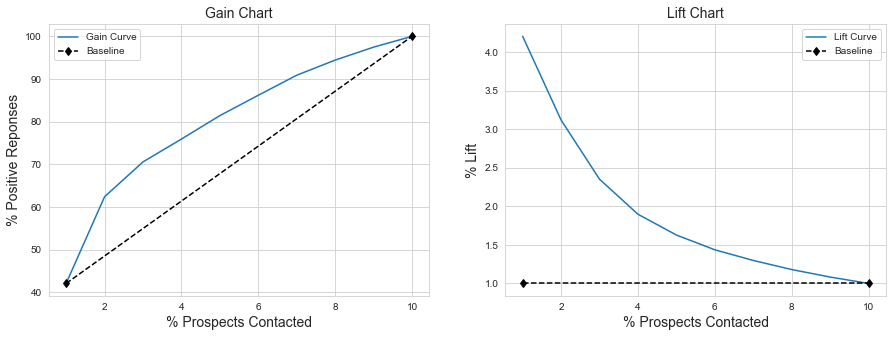

In [121]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(x='decile', y='gain', data=lift_df_final)
plt.plot([1, 10], [lift_df_final[lift_df_final.decile == 1].gain[0], 100], 'kd--')
plt.title('Gain Chart', fontsize=14)
plt.xlabel('% Prospects Contacted', fontsize=14)
plt.ylabel('% Positive Reponses', fontsize=14)
plt.legend(['Gain Curve','Baseline'])

plt.subplot(122)
sns.lineplot(x='decile', y='cumlift', data=lift_df_final)
plt.plot([1, 10], [1,1], 'kd--')
plt.title('Lift Chart', fontsize=14)
plt.xlabel('% Prospects Contacted', fontsize=14)
plt.ylabel('% Lift', fontsize=14)
plt.legend(['Lift Curve','Baseline'])

plt.show()

### Cumulative Gains Chart: 

`It plots the responders captured against the number of prospects targeted.`

- **Y-axis**: shows the percentage of positive responses. This is a percentage of the total possible positive responses
    - 1,382 as the total number of responses
    - 11.19 % as the percentage.
    
    
- **X-axis**: shows the percentage of customers contacted, which is a fraction of the 12,353 total customers.


- **Baseline (overall response rate)**: If we contact X% of customers then we will receive X% of the total positive responses (When model is not used)


- **Gain Curve**: Using the predictions of the response model, **80%** of the total responders can be captured by targetting the **top 50%** of the prospects
    - Top 50% prospects: 6176
    - 80% of response: 1125

### Lift Chart:

`It compares the response rate with and without using the model; Shows the actual lift.`

- **Y-axis**: shows the ratio between the result predicted by our model and the result using no model.
    
    
- **X-axis**: shows the percentage of customers contacted, which is a fraction of the 12,353 total customers.


- **Baseline (overall response rate)**: If we contact X% of customers then we will receive X% of the total positive responses (When model is not used)


- **Lift Curve**: Using the predictions of the response model, by targetting the **top 50%** of the prospects, we can get 1.63 times the original response rate.
    - Original response rate = 11.19
    - Lift of 1.63 => 11.19 * 1.63 = **18.22%**

#### Report the average call duration for targetting the top X% of the total prospects.

In [122]:
print('Average call duration for targetting the top 50%: {0} mins'.format(round(lift_df_final[0:5]['avg_duration'].sum()/5),2))

Average call duration for targetting the top 50%: 255.0 mins


#### Total cost of call for targetting top 50% 

In [123]:
print('Total call cost for targetting the top 50%: Rs {0} '.format(lift_df_final[0:5]['total_callcost'].sum()/5))

Total call cost for targetting the top 50%: Rs 58460.8 


#### Cost Benefit

In [124]:
# when no model is used.
print('Original Cost: Rs {0} '.format(lift_df_final['total_callcost'].sum()))

Original Cost: Rs 358319.0 


In [125]:
# when model is used, cost in terms of percentage of the original cost
print('80% of the resopnses can be achieved by using {0} % of the total cost.'
      .format(round(((lift_df_final[0:5]['total_callcost'].sum()/5)/lift_df_final['total_callcost'].sum())*100,2)))

80% of the resopnses can be achieved by using 16.32 % of the total cost.


## Conclusion

- 80% of the total responses can be captured by targetting top 50% of the prespects.
- This can be achieved by utilizing around 16% of the total cost.
    - Saving of around 84%